<a href="https://colab.research.google.com/github/tasosnikitakis/Machine-and-Deep-Learning/blob/main/Recurrent_Neural_Networks_LTSM_model_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Here we add the first LSTM layer with the LSTM method. We need to specify three arguments and all the others will be left to their default values. The number of memory cells or neurons is specified with the units parameter and because we need to have a high dimensionality we choose 50. We then set return_sequences to "True" because we are creating a stacked LSTM and we will have additional layers after the first one. The last one is input_shape and we need to only specify the last two dimensions of the X_train input array, meaning X_train.shape[1] and  1 corresponding to the time steps (60 in our case) and the indicators (one). We are also adding Dropout reguralisation by adding the Dropout object from the relevant class. The most used value is 0,20 meaning we drop 20% of the neurons in the layer for normalisation purposes.

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

The final layer does not need to have return_sequences set to True so we remove the argument altogether

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer="adam", loss = "mean_squared_error")

We are using the adam (stochastic gradient descent) optimizer instead of to RMSprop stock on of the keras module as it offers a more powerful approach to this problem. As for the loss function because we are dealing with a problem of continuous values it is in essence a regression problem and we need the mean squared error loss function.

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, epochs = 100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 12s 15ms/step - loss: 0.0364
Epoch 2/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0039
Epoch 13/100
38/38 [====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [15]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


### Getting the predicted stock price of 2017

In [18]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)



1/1 [==============================] - 0s 22ms/step
[[791.8538 ]
 [788.8954 ]
 [788.3693 ]
 [789.64545]
 [792.96075]
 [798.6214 ]
 [804.23193]
 [806.97723]
 [807.2826 ]
 [806.6512 ]
 [806.2197 ]
 [806.2058 ]
 [806.4466 ]
 [807.1642 ]
 [808.14276]
 [811.97424]
 [818.4186 ]
 [825.87396]
 [830.58636]
 [827.7023 ]]


### Visualising the results

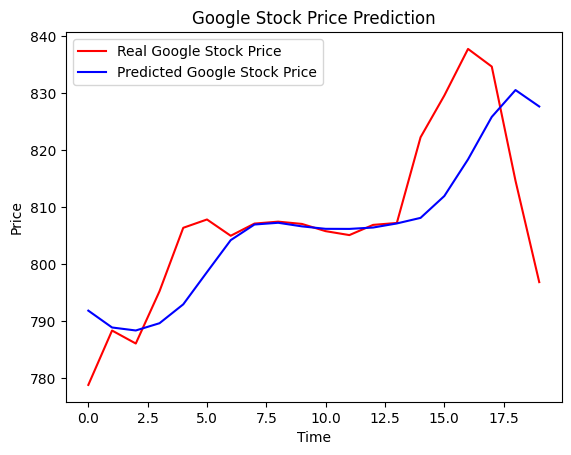

In [19]:
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()